In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [101]:
%matplotlib inline

In [102]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 
              'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [103]:
sales = pd.read_csv('kc_house_data.csv', dtype= dtype_dict)

In [104]:
def data_prep(df, features, output):
    x = df[features].as_matrix()
    b = np.ones(shape=(len(x),1), dtype=np.float32)
    x = np.concatenate((b,x), axis=1)
    y = np.array(df[output])
    return x,y


In [131]:
class Ridge_GD:
    def __init__(self, train_x, train_y, test_x, test_y, lr, penalty, max_iter=100, init_weight=None):
        self.train_x = train_x
        self.train_y = train_y
        self.train_N = len(train_y)
        self.test_x = test_x
        self.test_y = test_y
        self.w = np.array(init_weight) if init_weight is not None else np.zeros(shape=(self.train_x.shape[1]))
        self.lr = lr
        self.max_iter = max_iter
        self.penalty = penalty
        
    def predict_outcome(self, feature_matrix, weights):
        predictions = np.dot(feature_matrix, weights)
        return predictions
    def error_calc(self, target, predictions):
        return (predictions - target)
    def RSS(self, error):
        return np.sum(error**2)
#         return (np.sum(error**2) + self.penalty * np.sum(self.w**2))
        
    def fit(self):
        Train_RSS=[]
        #converged = False
        for it in range(self.max_iter):
        #while not converged:
            y_hat = self.predict_outcome(self.train_x, self.w)
            error = self.error_calc(self.train_y, y_hat)
            grad_w = self.gradient_calc(error)
            self.w = self.update_w(self.w, grad_w, self.lr)
            r = self.RSS(error)
            print(r)
            Train_RSS.append(self.RSS(error))
        plt.plot(Train_RSS[:])
        plt.show()
        return self.w, Train_RSS[-1]
    def gradient_calc(self, error):
        features = self.train_x
        grad = np.dot(features.T, error)
        grad = 2 * grad
        grad[1:] += 2*self.penalty*self.w[1:]
        assert (grad.shape == self.w.shape), "Gradient and weight have different shapes"
        return grad
    def update_w(self, weight, grad_w, lr):
        weight = weight - lr*grad_w
        return weight
    def test_RSS(self):
        test_x = self.test_x
        test_y = self.test_y
        weight = self.w
        test_predict= self.predict_outcome(feature_matrix=test_x, weights=weight)
        test_error = self.error_calc(target= test_y, predictions= test_predict)
        test_rss = self.RSS(error = test_error)
        return test_rss
    def predict(self, x):
        return np.dot(x, self.w)

In [132]:
a=np.array([1,2,3])
b = np.array([2,3,4])

a[1:] += 2*b[1:]

In [133]:
train_data = pd.read_csv('kc_house_train_data.csv', dtype= dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype= dtype_dict)

In [134]:
train_data_sg_feature, train_y = data_prep(df=train_data, features=['sqft_living'], output='price')
test_data_sg_feature, test_y = data_prep(df=test_data, features=['sqft_living'], output='price')

In [135]:
train_y.shape

(17384,)

In [136]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(shape=(train_data_sg_feature.shape[1],))

In [137]:
l2_low =0.0
l2_high = 1e11

In [138]:
model_sgf_lwp = Ridge_GD(train_x = train_data_sg_feature, train_y = train_y, test_x = test_data_sg_feature, test_y = test_y,
                         lr = step_size, penalty = l2_low, max_iter = max_iterations, init_weight = initial_weights)
model_sgf_hgp = Ridge_GD(train_x = train_data_sg_feature, train_y = train_y, test_x = test_data_sg_feature, test_y = test_y,
                         lr = step_size, penalty = l2_high, max_iter = max_iterations, init_weight = initial_weights)

7.43305185234e+15
5.39426721353e+15
4.02323773629e+15
3.1012561833e+15
2.4812476436e+15
2.0643080768e+15
1.78392709616e+15
1.59537820185e+15
1.4685839897e+15
1.38331819009e+15
1.32597916443e+15
1.28742016565e+15
1.26149024495e+15
1.24405304978e+15
1.23232699094e+15
1.22444152228e+15
1.21913875032e+15
1.21557277451e+15
1.21317474878e+15
1.21156213902e+15
1.21047770101e+15
1.20974844472e+15
1.20925803886e+15
1.2089282537e+15
1.20870648175e+15
1.20855734588e+15
1.20845705588e+15
1.20838961344e+15
1.20834426014e+15
1.20831376121e+15
1.20829325144e+15
1.20827945914e+15
1.20827018415e+15
1.20826394694e+15
1.20825975255e+15
1.20825693192e+15
1.20825503509e+15
1.20825375949e+15
1.20825290167e+15
1.20825232478e+15
1.20825193681e+15
1.20825167589e+15
1.20825150041e+15
1.20825138237e+15
1.20825130297e+15
1.20825124956e+15
1.20825121361e+15
1.20825118942e+15
1.20825117312e+15
1.20825116214e+15
1.20825115473e+15
1.20825114973e+15
1.20825114634e+15
1.20825114403e+15
1.20825114246e+15
1.20825114138e+

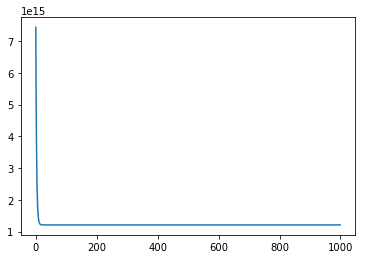

In [139]:
simple_weights_0_penalty, RSS_0_penalty = model_sgf_lwp.fit()

7.43305185234e+15
5.39426721353e+15
4.33261868821e+15
3.75219715583e+15
3.42223891202e+15
3.22915640098e+15
3.11386026121e+15
3.04407217169e+15
3.00145424875e+15
2.97528057615e+15
2.95914834508e+15
2.9491827716e+15
2.94301793298e+15
2.93920092846e+15
2.93683630646e+15
2.93537092745e+15
2.93446261997e+15
2.93389952986e+15
2.93355041622e+15
2.93333394924e+15
2.93319971826e+15
2.93311647311e+15
2.93306483985e+15
2.93303280678e+15
2.93301292646e+15
2.93300058131e+15
2.93299290826e+15
2.93298813212e+15
2.93298515218e+15
2.93298328597e+15
2.93298211032e+15
2.93298136285e+15
2.93298088087e+15
2.9329805635e+15
2.9329803482e+15
2.93298019619e+15
2.93298008342e+15
2.93297999498e+15
2.93297992162e+15
2.93297985763e+15
2.93297979943e+15
2.93297974483e+15
2.93297969245e+15
2.93297964146e+15
2.93297959133e+15
2.93297954173e+15
2.93297949246e+15
2.93297944339e+15
2.93297939445e+15
2.93297934559e+15
2.93297929678e+15
2.93297924799e+15
2.93297919923e+15
2.93297915048e+15
2.93297910173e+15
2.93297905299

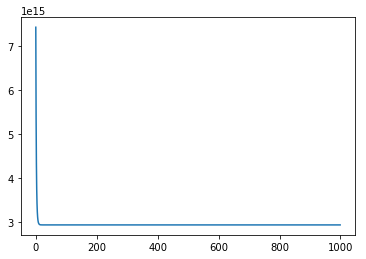

In [140]:
simple_weights_high_penalty, RSS_high_penalty = model_sgf_hgp.fit()

In [141]:
print(model_sgf_hgp.test_RSS())

6.9464210149e+14


In [142]:
print(model_sgf_lwp.test_RSS())

2.75723632154e+14


In [143]:
simple_weights_0_penalty

array([ -1.63113515e-01,   2.63024369e+02])

In [144]:
simple_weights_high_penalty

array([   9.76730382,  124.57217567])

In [145]:
train_data_db_feature, train_y = data_prep(df=train_data, features=['sqft_living', 'sqft_living15'], output='price')
test_data_db_feature, test_y = data_prep(df=test_data, features=['sqft_living', 'sqft_living15'], output='price')

In [146]:
step_size = 1e-12
max_iterations = 1000
initial_weights = np.zeros(shape=(train_data_db_feature.shape[1],))

In [147]:
l2_low =0.0
l2_high = 1e11

In [148]:
model_dbf_lwp = Ridge_GD(train_x = train_data_db_feature, train_y = train_y, test_x = test_data_db_feature, test_y = test_y,
                         lr = step_size, penalty = l2_low, max_iter = max_iterations, init_weight = initial_weights)
model_dbf_hgp = Ridge_GD(train_x = train_data_db_feature, train_y = train_y, test_x = test_data_db_feature, test_y = test_y,
                         lr = step_size, penalty = l2_high, max_iter = max_iterations, init_weight = initial_weights)

7.43305185234e+15
4.05675233205e+15
2.52956511453e+15
1.8385566943e+15
1.52567557515e+15
1.38378949857e+15
1.31923260615e+15
1.28964887188e+15
1.27588472391e+15
1.2692788074e+15
1.26591437877e+15
1.26402022193e+15
1.26279533513e+15
1.26187745091e+15
1.26110269937e+15
1.26039692713e+15
1.25972655151e+15
1.2590763366e+15
1.25843934355e+15
1.25781238602e+15
1.25719397516e+15
1.25658339031e+15
1.25598025872e+15
1.25538436554e+15
1.25479556785e+15
1.25421375582e+15
1.25363883512e+15
1.25307071893e+15
1.25250932437e+15
1.25195457086e+15
1.25140637936e+15
1.25086467203e+15
1.25032937208e+15
1.24980040367e+15
1.24927769189e+15
1.24876116274e+15
1.24825074308e+15
1.24774636064e+15
1.24724794402e+15
1.24675542266e+15
1.24626872681e+15
1.24578778759e+15
1.2453125369e+15
1.24484290745e+15
1.24437883276e+15
1.24392024714e+15
1.24346708564e+15
1.24301928412e+15
1.24257677918e+15
1.24213950817e+15
1.24170740918e+15
1.24128042104e+15
1.24085848331e+15
1.24044153623e+15
1.24002952079e+15
1.23962237866e

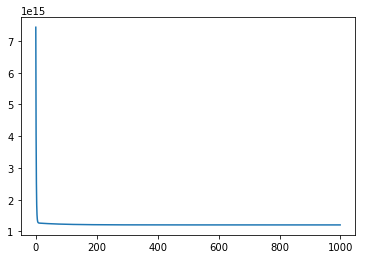

In [149]:
simple_weights_0_penalty, RSS_0_penalty = model_dbf_lwp.fit()

7.43305185234e+15
4.05675233205e+15
2.92123382683e+15
2.48720895136e+15
2.30491024157e+15
2.22377417091e+15
2.18648545022e+15
2.16904599176e+15
2.1608024298e+15
2.15687196525e+15
2.15497939131e+15
2.15405536117e+15
2.15359472488e+15
2.15335790325e+15
2.15323076051e+15
2.1531585744e+15
2.15311484705e+15
2.15308654591e+15
2.15306710558e+15
2.15305310021e+15
2.15304265398e+15
2.1530346764e+15
2.15302849015e+15
2.15302364647e+15
2.15301983113e+15
2.15301681452e+15
2.15301442371e+15
2.15301252584e+15
2.15301101751e+15
2.15300981761e+15
2.1530088622e+15
2.15300810072e+15
2.15300749315e+15
2.15300700775e+15
2.15300661933e+15
2.15300630792e+15
2.15300605764e+15
2.15300585592e+15
2.15300569274e+15
2.15300556018e+15
2.15300545192e+15
2.15300536296e+15
2.15300528932e+15
2.15300522786e+15
2.15300517606e+15
2.15300513194e+15
2.1530050939e+15
2.15300506071e+15
2.15300503136e+15
2.15300500506e+15
2.15300498118e+15
2.15300495923e+15
2.1530049388e+15
2.15300491959e+15
2.15300490134e+15
2.15300488385e+1

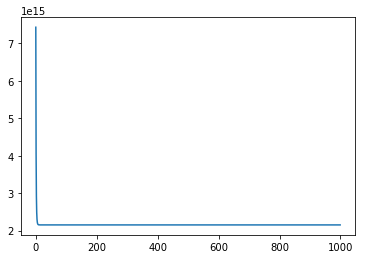

In [150]:
simple_weights_high_penalty, RSS_high_penalty = model_dbf_hgp.fit()

In [151]:
simple_weights_0_penalty

array([  -0.35743483,  243.05416982,   22.41481497])

In [152]:
simple_weights_high_penalty

array([  6.74296579,  91.48927365,  78.43658766])

In [153]:
print(model_dbf_lwp.test_RSS())

2.74067615919e+14


In [154]:
print(model_dbf_hgp.test_RSS())

5.00404800501e+14


In [155]:
test_data_db_feature[0]

array([  1.00000000e+00,   1.43000000e+03,   1.78000000e+03])

In [156]:
test_y[0]

310000.0

In [157]:
p_0=model_dbf_lwp.predict(test_data_db_feature[0])
print ("Predicted from 0 penalty double feature model: {}".format(p_0))
p_h=model_dbf_hgp.predict(test_data_db_feature[0])
print ("Predicted from high penalty double feature model: {}".format(p_h))

Predicted from 0 penalty double feature model: 387465.4760582354
Predicted from high penalty double feature model: 270453.5303219406
